## Loss function

$$
\large \ell = \frac{1}{2n}\sum_i^n{\left(y_i - \hat{y}_i\right)^2}
$$

# Forward Pass and Backward Pass  
 
 <img src='assets/backprop_diagram.png' width=550px>

In [1]:
# Download Data

import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))
                               ])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [2]:
trainset

Dataset MNIST
    Number of datapoints: 60000
    Root location: C:\Users\vivekanand.joshi/.pytorch/MNIST_data/
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

In [3]:
trainloader

In [4]:
# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10))


print(model)
# Define the loss
criterion = nn.CrossEntropyLoss()

# Get our data
images, labels = next(iter(trainloader))
# Flatten images
images = images.view(images.shape[0], -1)

# Forward pass, get our logits
logits = model(images)
# Calculate the loss with the logits and the labels
loss = criterion(logits, labels)

print(loss)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
)
tensor(2.2939, grad_fn=<NllLossBackward>)


In [5]:
images.shape

torch.Size([64, 784])

In [6]:
labels

tensor([7, 3, 5, 2, 8, 0, 0, 5, 6, 2, 7, 2, 9, 1, 8, 9, 0, 4, 0, 5, 8, 5, 1, 7,
        6, 3, 9, 7, 9, 1, 1, 5, 9, 4, 1, 0, 3, 8, 0, 1, 4, 2, 5, 3, 0, 0, 1, 3,
        1, 9, 8, 7, 1, 4, 6, 6, 1, 5, 0, 4, 5, 1, 2, 8])

In [7]:
labels.shape

torch.Size([64])

>**Exercise:** Build a model that returns the log-softmax as the output and calculate the loss using the negative log likelihood loss.

In [8]:
#Build a forward-feed network

model = nn.Sequential(nn.Linear(784, 128),
                     nn.ReLU(),
                     nn.Linear(128, 64),
                     nn.ReLU(),
                     nn.Linear(64, 10),
                     nn.Softmax(dim =1))

#Define the loss
criterion = nn.NLLLoss()

#Get our data
images, labels = next(iter(trainloader))

print(images.shape)
#Flatten Images

images = images.view(images.shape[0], -1)

print(images.shape)
#Forward pass, get log probabilties
logps = model(images)

#Calculate the loss with the logps and the labels
loss = criterion(logps, labels)

print(loss)



torch.Size([64, 1, 28, 28])
torch.Size([64, 784])
tensor(-0.1016, grad_fn=<NllLossBackward>)


# Autograd

In [9]:
x = torch.randn(2,2, requires_grad=True)

In [10]:
x

tensor([[ 0.1697, -1.0934],
        [ 0.1979,  0.4090]], requires_grad=True)

In [11]:
y = x**2

In [12]:
y

tensor([[0.0288, 1.1955],
        [0.0392, 0.1673]], grad_fn=<PowBackward0>)

In [13]:
print(y.grad_fn)

In [14]:
z = y.mean()

In [15]:
z

tensor(0.3577, grad_fn=<MeanBackward0>)

In [16]:
print(x.grad, y.grad)

None None


In [17]:
z.backward()
print(x.grad)

tensor([[ 0.0848, -0.5467],
        [ 0.0990,  0.2045]])


In [18]:
print(x/2)

tensor([[ 0.0848, -0.5467],
        [ 0.0990,  0.2045]], grad_fn=<DivBackward0>)


To calculate the gradients, you need to run the `.backward` method on a Variable, `z` for example. This will calculate the gradient for `z` with respect to `x`

$$
\frac{\partial z}{\partial x} = \frac{\partial}{\partial x}\left[\frac{1}{n}\sum_i^n x_i^2\right] = \frac{x}{2}
$$

If we notice we did two operations on x, first raise to the power 2 and then mean on the result to get z. So if we want to calculate gradient of z with respect to x , it is x/2

# Loss and Autograd together

In [20]:
#Build a forward-feed network

model = nn.Sequential(nn.Linear(784, 128),
                     nn.ReLU(),
                     nn.Linear(128,64),
                     nn.ReLU(),
                     nn.Linear(64,10),
                     nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images)
loss = criterion(logps,labels)

In [21]:
print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[ 1.5155e-04,  1.5155e-04,  1.5155e-04,  ...,  1.5155e-04,
          1.5155e-04,  1.5155e-04],
        [ 1.0358e-03,  1.0358e-03,  1.0358e-03,  ...,  1.0358e-03,
          1.0358e-03,  1.0358e-03],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        ...,
        [-9.3178e-05, -9.3178e-05, -9.3178e-05,  ..., -9.3178e-05,
         -9.3178e-05, -9.3178e-05],
        [-1.8326e-03, -1.8326e-03, -1.8326e-03,  ..., -1.8326e-03,
         -1.8326e-03, -1.8326e-03],
        [ 1.1474e-05,  1.1474e-05,  1.1474e-05,  ...,  1.1474e-05,
          1.1474e-05,  1.1474e-05]])


## Training the network!

There's one last piece we need to start training, an optimizer that we'll use to update the weights with the gradients. We get these from PyTorch's [`optim` package](https://pytorch.org/docs/stable/optim.html). For example we can use stochastic gradient descent with `optim.SGD`. You can see how to define an optimizer below.

In [23]:
from torch import optim

# Optimizers require the parameters to optimize and a learning rate

optimizer = optim.SGD(model.parameters(), lr = 0.01)

The general process with PyTorch:

* Make a forward pass through the network 
* Use the network output to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

In [24]:
print(' Initial weights - ', model[0].weight)

images, labels = next(iter(trainloader))

images.resize_(64, 784)

#Clear the gradients , do this because gradients are accumulated

optimizer.zero_grad()

#Forward pass, then backward pass, then update weights

output = model.forward(images)
loss = criterion(output, labels)


loss.backward()

print('Gradient - ', model[0].weight.grad)

 Initial weights -  Parameter containing:
tensor([[-0.0028,  0.0163,  0.0247,  ...,  0.0202, -0.0056,  0.0142],
        [-0.0274,  0.0277,  0.0328,  ...,  0.0206,  0.0335,  0.0106],
        [ 0.0190,  0.0284,  0.0104,  ...,  0.0246, -0.0004, -0.0245],
        ...,
        [ 0.0189, -0.0033,  0.0237,  ...,  0.0118,  0.0098, -0.0028],
        [ 0.0159,  0.0104, -0.0232,  ..., -0.0181, -0.0319, -0.0077],
        [-0.0175,  0.0181, -0.0095,  ..., -0.0198, -0.0194,  0.0002]],
       requires_grad=True)
Gradient -  tensor([[-0.0025, -0.0025, -0.0025,  ..., -0.0025, -0.0025, -0.0025],
        [ 0.0021,  0.0021,  0.0021,  ...,  0.0021,  0.0021,  0.0021],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0008,  0.0008,  0.0008,  ...,  0.0008,  0.0008,  0.0008],
        [ 0.0012,  0.0012,  0.0012,  ...,  0.0012,  0.0012,  0.0012],
        [-0.0003, -0.0003, -0.0003,  ..., -0.0003, -0.0003, -0.0003]])


In [29]:
optimizer.step()
print('Updated weights -', model[0].weight)

Updated weights - Parameter containing:
tensor([[-0.0027,  0.0164,  0.0248,  ...,  0.0203, -0.0054,  0.0143],
        [-0.0275,  0.0276,  0.0327,  ...,  0.0205,  0.0334,  0.0105],
        [ 0.0190,  0.0284,  0.0104,  ...,  0.0246, -0.0004, -0.0245],
        ...,
        [ 0.0188, -0.0033,  0.0236,  ...,  0.0118,  0.0098, -0.0028],
        [ 0.0158,  0.0103, -0.0232,  ..., -0.0182, -0.0319, -0.0077],
        [-0.0175,  0.0181, -0.0095,  ..., -0.0198, -0.0194,  0.0003]],
       requires_grad=True)


# Training for Real

> **Exercise: ** Implement the training pass for our network. If you implemented it correctly, you should see the training loss drop with each epoch.

In [33]:
model = nn.Sequential(nn.Linear(784, 128),
                     nn.ReLU(),
                     nn.Linear(128, 64),
                     nn.ReLU(),
                     nn.Linear(64, 10),
                     nn.LogSoftmax(dim = 1))

criterion = nn.NLLLoss()

optimizer = optim.SGD(model.parameters(), lr=0.003)

epochs = 5

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        #Flatten images to 784 dimension long vector - 
        images = images.view(images.shape[0], -1)
                
        
        optimizer.zero_grad()
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss +=loss.item()
    else:
        print(f"Training Loss : {running_loss/len(trainloader)}")


Training Loss : 1.9224002226583485
Training Loss : 0.8950668713494913
Training Loss : 0.5637411376687763
Training Loss : 0.45065662215577007
Training Loss : 0.39405120392915793


### Check out the predictions

In [34]:
%matplotlib inline
import helper

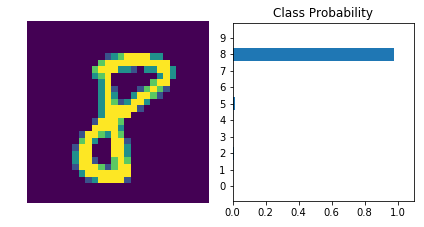

In [51]:
images, labels = next(iter(trainloader))

img = images[0].view(1, 784)

#Turn off the gradients to spped up

with torch.no_grad():
    logps = model.forward(img)
    
# Output of the network are logits, needs to take softmax for probabilities

ps = torch.exp(logps)
helper.view_classify(img.view(1, 28, 28), ps)